# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata-Copy1.csv"
study_results_path = "Study_results-Copy1.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "right")
# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [2]:
df_by_drug = df.groupby("Drug Regimen")
vol_mean = df_by_drug.mean()["Tumor Volume (mm3)"]
vol_median = df_by_drug.median()["Tumor Volume (mm3)"]
vol_variance = df_by_drug.var()["Tumor Volume (mm3)"]
vol_std = df_by_drug.std()["Tumor Volume (mm3)"]
vol_sem = df_by_drug.sem()["Tumor Volume (mm3)"]
summary_df = pd.DataFrame({"Mean Tumor Volume": vol_mean, "Median Tumor Volume": vol_median, 
                           "Tumor Volume Variance": vol_variance, "Tumor Volume Std. Dev.": vol_std,
                          "Tumor Volume Std. Err.": vol_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3]:
summary_df_new = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_df_new

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

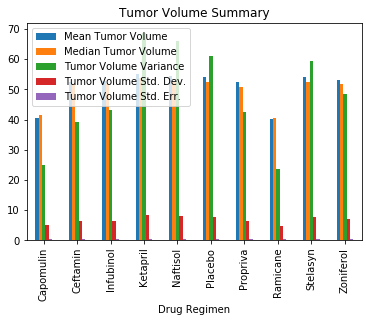

In [4]:
summary_chart = summary_df.plot(kind = "bar", title = "Tumor Volume Summary")
plt.show(summary_chart)

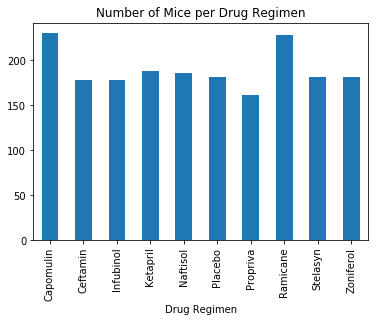

In [5]:
drug_count = df.groupby("Drug Regimen").count()["Mouse ID"]
drugcount_chart_pandas = drug_count.plot(kind = "bar", title = "Number of Mice per Drug Regimen")
plt.show(drugcount_chart_pandas)

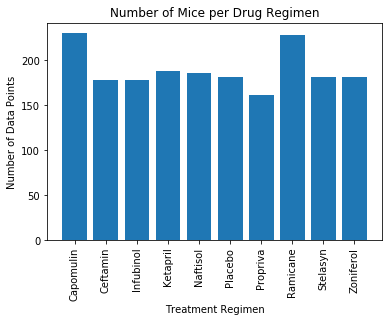

In [6]:
x_axis = drug_count.index
y_axis = drug_count.values
drugcount_chart_matplotlib = plt.bar(x_axis, y_axis, )
plt.xticks(rotation = 90)
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Mice per Drug Regimen")
plt.show(drugcount_chart_matplotlib)

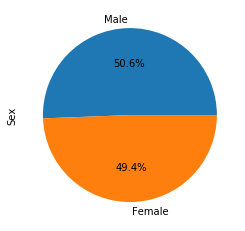

In [7]:
sex_count = df["Sex"].value_counts()
sex_distribution_pie_chart = sex_count.plot(kind = "pie", autopct='%1.1f%%')

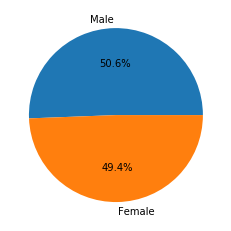

In [8]:
sex_distribution_pie_chart_matplotlib = plt.pie(sex_count.values,labels=sex_count.index.values, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [9]:
final_tp = df.groupby("Mouse ID")["Timepoint"].max()
final_tp = final_tp.reset_index()

final_tumor_volume = pd.merge(final_tp, df)
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [10]:
quartiles = final_tumor_volume.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile([.25,.5,.75])

cap_lowq = quartiles["Capomulin"][0.25]
cap_uppq = quartiles["Capomulin"][0.75]
capIQR = cap_uppq - cap_lowq
cap_lowbound = cap_lowq - (1.5*capIQR)
cap_uppbound = cap_uppq + (1.5*capIQR)

ram_lowq = quartiles["Ramicane"][0.25]
ram_uppq = quartiles["Ramicane"][0.75]
ramIQR = ram_uppq - ram_lowq
ram_lowbound = ram_lowq - (1.5*ramIQR)
ram_uppbound = ram_uppq + (1.5*ramIQR)

inf_lowq = quartiles["Infubinol"][0.25]
inf_uppq = quartiles["Infubinol"][0.75]
infIQR = inf_uppq - inf_lowq
inf_lowbound = inf_lowq - (1.5*infIQR)
inf_uppbound = inf_uppq + (1.5*infIQR)

cef_lowq = quartiles["Ceftamin"][0.25]
cef_uppq = quartiles["Ceftamin"][0.75]
cefIQR = cef_uppq - cef_lowq
cef_lowbound = cef_lowq - (1.5*cefIQR)
cef_uppbound = cef_uppq + (1.5*cefIQR)

In [11]:
short_df = final_tumor_volume[["Drug Regimen", "Tumor Volume (mm3)"]]
cap_outlier_list = []
ram_outlier_list = []
inf_outlier_list = []
cef_outlier_list = []
for i,j in short_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]:
    
    if i == "Capomulin":
        for num in j.values:
            if num < cap_lowbound or num > cap_uppbound:
                cap_outlier_list.append(num)
    
    if i == "Ramicane":
        for num in j.values:
            if num < ram_lowbound or num > ram_uppbound:
                ram_outlier_list.append(num)
    
    if i == "Infubinol":
        for num in j.values:
            if num < inf_lowbound or num > inf_uppbound:
                inf_outlier_list.append(num)
    
    if i == "Ceftamin":
        for num in j.values:
            if num < cef_lowbound or num > cef_uppbound:
                cef_outlier_list.append(num)

print(f"Capomulin potential outliers: {cap_outlier_list}")
print(f"Ramicane potential outliers: {ram_outlier_list}")
print(f"Infubinol potential outliers: {inf_outlier_list}")
print(f"Ceftamin potential outliers: {cef_outlier_list}")

Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.321345799999996]
Ceftamin potential outliers: []


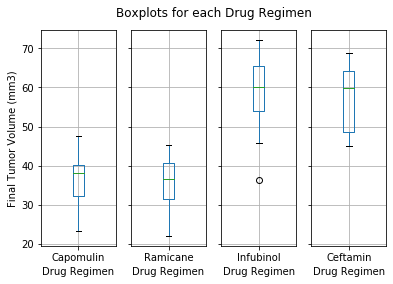

In [14]:
cap_df = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Capomulin"]
ram_df = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Ramicane"]
inf_df = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Infubinol"]
cef_df = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Ceftamin"]

fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, sharey = True)

cap_df.boxplot(column = "Tumor Volume (mm3)", by="Drug Regimen", ax=ax1)
ram_df.boxplot(column = "Tumor Volume (mm3)", by="Drug Regimen", ax=ax2)
inf_df.boxplot(column = "Tumor Volume (mm3)", by="Drug Regimen", ax=ax3)
cef_df.boxplot(column = "Tumor Volume (mm3)", by="Drug Regimen", ax=ax4)
ax1.set_title("")
ax2.set_title("")
ax3.set_title("")
ax4.set_title("")
fig.suptitle("Boxplots for each Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

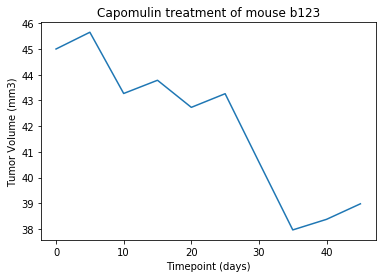

In [15]:
capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]
mouse_b128_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
x_axis = mouse_b128_df["Timepoint"].values
y_axis = mouse_b128_df["Tumor Volume (mm3)"].values
plt.plot(x_axis,y_axis)
plt.title("Capomulin treatment of mouse b123")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

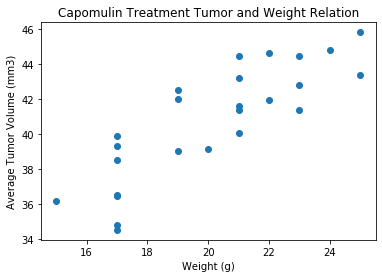

In [16]:
x_axis = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
y_axis = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(x_axis,y_axis)
plt.title("Capomulin Treatment Tumor and Weight Relation")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

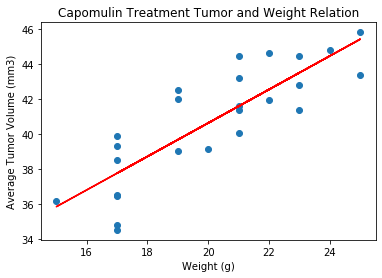

The correlation between mouse weight and average tumor volume is 0.8419363424694718


In [17]:
(slope, intercept, rvalue, pval, sterr) = st.linregress(x_axis,y_axis)
yvals = slope * x_axis + intercept
plt.scatter(x_axis,y_axis)
plt.title("Capomulin Treatment Tumor and Weight Relation")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.plot(x_axis, yvals, "r-")
plt.show()
print(f"The correlation between mouse weight and average tumor volume is {rvalue}")